### Charge-to-Mass Ratio Lab - Data & Results

This notebook includes all data processing, graphs, and final calculations for the Charge-to-Mass Lab. 

In [1]:
import matplotlib.pyplot as plt
import math
from uncertainties import ufloat, umath, unumpy
import numpy as np
import pandas as pd

coil_number_of_turns = 130
coil_radius = ufloat(0.16, 0.0025)
mu_0 = 4*(math.pi)/(10**7)

#### Part 1 - Experimentally Collected Data

Data was collected in two phases. In the first phase, the current through the Hemholtz coils, and the diameter of the electron beam's circular path was measured applied accelerating voltages (i.e. various electron velocities). In the second phase, the voltage (and therefore the electron velocity) was fixed, and the diameter of the path was instead measured at various coil currents. This data is recorded below. 

In [2]:
#Part 1 - Fixed Current

fixed_current = ufloat(1.198, 0.001)

fixed_current_voltages = unumpy.uarray([122.3, 138.2, 145.3, 159.5, 170.4, 184.0, 199.2, 208.0, 226.1, 240.2, 265.7, 
282.5, 298.0, 308.5, 341.8], [0.1]*15) #applied voltages and uncertainties

fixed_current_path_diameters = unumpy.uarray([0.058, 0.064, 0.068, 0.073, 0.078, 0.083, 0.087, 0.090, 0.094, 0.097, 0.101, 
0.106, 0.108, 0.110, 0.113], [0.001]*15) #path diameter measurements and uncertainties
fixed_current_path_radii = fixed_current_path_diameters/2 #path radius and uncertainties

output_fixed_current_voltages = np.expand_dims(fixed_current_voltages, 0) #this code outputs the observations to a table
output_fixed_current_path_diameters = np.expand_dims(fixed_current_path_diameters, 0)
output_fixed_current = np.array([output_fixed_current_voltages, output_fixed_current_path_diameters]).squeeze(1).transpose()
print(pd.DataFrame(output_fixed_current, columns=["Applied Voltages [V]", "Observed Path Diameters [m]"]))


   Applied Voltages [V] Observed Path Diameters [m]
0         122.30+/-0.10             0.0580+/-0.0010
1         138.20+/-0.10             0.0640+/-0.0010
2         145.30+/-0.10             0.0680+/-0.0010
3         159.50+/-0.10             0.0730+/-0.0010
4         170.40+/-0.10             0.0780+/-0.0010
5         184.00+/-0.10             0.0830+/-0.0010
6         199.20+/-0.10             0.0870+/-0.0010
7         208.00+/-0.10             0.0900+/-0.0010
8         226.10+/-0.10             0.0940+/-0.0010
9         240.20+/-0.10             0.0970+/-0.0010
10        265.70+/-0.10             0.1010+/-0.0010
11        282.50+/-0.10             0.1060+/-0.0010
12        298.00+/-0.10             0.1080+/-0.0010
13        308.50+/-0.10             0.1100+/-0.0010
14        341.80+/-0.10             0.1130+/-0.0010


In [3]:
#Part 2 - Fixed Accelerating Voltage

fixed_voltage = ufloat(161.1, 0.1)

fixed_voltage_currents = unumpy.uarray([1.923, 1.802, 1.707, 1.604, 1.498, 1.397, 1.301, 1.211, 1.088, 0.999, 0.904,
0.793, 0.695], [0.001]*13) #test currents and uncertainties

fixed_voltage_path_diameters = unumpy.uarray([0.050, 0.053, 0.055, 0.056, 0.059, 0.063, 0.069, 0.075, 0.083, 0.091, 0.099,
0.108, 0.114], [0.001]*13) #path diameter measurements and uncertainties
fixed_voltage_path_radii = fixed_voltage_path_diameters/2 #path radius and uncertainties

output_fixed_voltage_currents = np.expand_dims(fixed_voltage_currents, 0) #this code outputs the observations to a table
output_fixed_voltage_path_diameters = np.expand_dims(fixed_voltage_path_diameters, 0)
output_fixed_voltage = np.array([output_fixed_voltage_currents, output_fixed_voltage_path_diameters]).squeeze(1).transpose()
print(pd.DataFrame(output_fixed_voltage, columns=["Coil Currents [A]", "Observed Path Diameters [m]"]))

   Coil Currents [A] Observed Path Diameters [m]
0    1.9230+/-0.0010             0.0500+/-0.0010
1    1.8020+/-0.0010             0.0530+/-0.0010
2    1.7070+/-0.0010             0.0550+/-0.0010
3    1.6040+/-0.0010             0.0560+/-0.0010
4    1.4980+/-0.0010             0.0590+/-0.0010
5    1.3970+/-0.0010             0.0630+/-0.0010
6    1.3010+/-0.0010             0.0690+/-0.0010
7    1.2110+/-0.0010             0.0750+/-0.0010
8    1.0880+/-0.0010             0.0830+/-0.0010
9    0.9990+/-0.0010             0.0910+/-0.0010
10   0.9040+/-0.0010             0.0990+/-0.0010
11   0.7930+/-0.0010             0.1080+/-0.0010
12   0.6950+/-0.0010             0.1140+/-0.0010


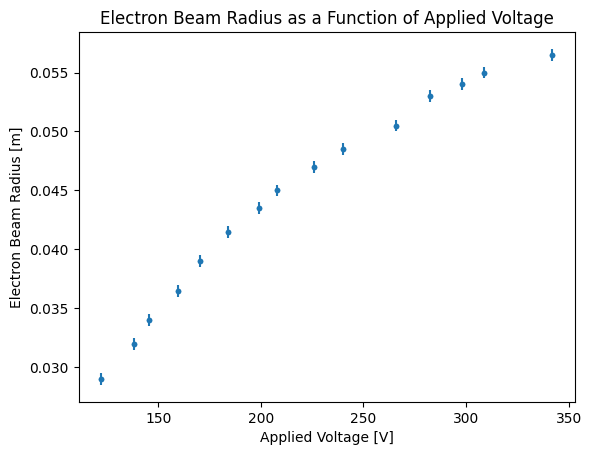

In [4]:
#scatter plot of observed beam radii as a function of the varying voltage, with error bars
plt.scatter([x.n for x in fixed_current_voltages], [x.n for x in fixed_current_path_radii], marker='.')
plt.errorbar([x.n for x in fixed_current_voltages], [x.n for x in fixed_current_path_radii], 
yerr=[x.s for x in fixed_current_path_radii], xerr=[x.s for x in fixed_current_voltages], fmt='.') 

plt.xlabel("Applied Voltage [V]")
plt.ylabel("Electron Beam Radius [m]")
plt.title("Electron Beam Radius as a Function of Applied Voltage")

plt.show()

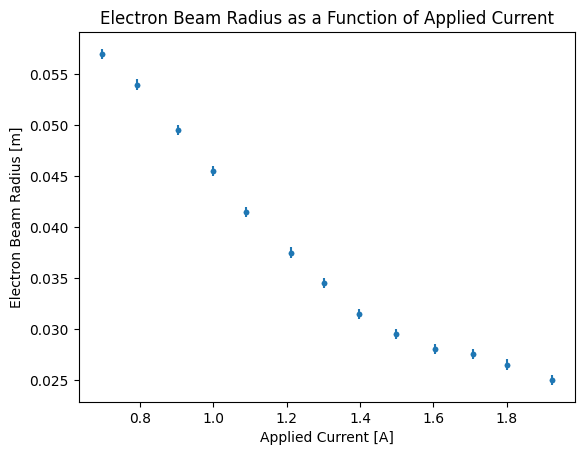

In [5]:
#scatter plot of observed beam radii as a function of the varying current, with error bars
plt.scatter([x.n for x in fixed_voltage_currents], [x.n for x in fixed_voltage_path_radii], marker='.')
plt.errorbar([x.n for x in fixed_voltage_currents], [x.n for x in fixed_voltage_path_radii], 
yerr=[x.s for x in fixed_voltage_path_radii], xerr=[x.s for x in fixed_voltage_currents], fmt='.')

plt.xlabel("Applied Current [A]")
plt.ylabel("Electron Beam Radius [m]")
plt.title("Electron Beam Radius as a Function of Applied Current")

plt.show()

### Part 2 - Calculation and Correction of Magnetic Field Strength

This part provides calculations to determine the magnetic field strength within the coils, which is necessary to eventually find the magnetic force exerted on the electron, and therefore its charge-to-mass ratio. We first calculate $B_{c}$ and apply the correction factor discussed in the report.

In [6]:
#this function corrects the magnetic field strength based on Equation 7 in the report
def field_correction_factor(rho, coil_radius):
    alpha = ((rho/coil_radius)**(2))
    correction_factor = 1 - ((alpha)**(2))/((0.6583 + 0.29*alpha)**2)
    return correction_factor


#Fixed Current calculation

fixed_current_B_coil = (((0.8)**(1.5))*(mu_0)*(coil_number_of_turns)/(coil_radius))*fixed_current #calculates the uncorrected current in the coils
fixed_current_B_coil_values = [fixed_current_B_coil]*15 #creates array to store corrected currents

for i in range(len(fixed_current_path_radii)): #loops through all beam radii
    if fixed_current_path_radii[i].n > 0.032: #sets rho
        rho = fixed_current_path_radii[i]
    else:
        rho = 0.064 - fixed_current_path_radii[i]
    
    fixed_current_B_coil_values[i] = fixed_current_B_coil_values[i]*field_correction_factor(rho, coil_radius) #updates field strength for each data point

#Fixed Voltage calculation

k = (((0.8)**(1.5))*(mu_0)*(coil_number_of_turns)/(coil_radius))
fixed_voltage_B_coil_values = [k*x for x in fixed_voltage_currents] #sets uncorrected field strength values at each voltage


for i in range(0, len(fixed_voltage_path_radii)): #loops through all beam radii data points
    if fixed_voltage_path_radii[i].n > 0.032: #sets who
        rho = fixed_voltage_path_radii[i]
    else:
        rho = 0.064 - fixed_voltage_path_radii[i]
    
    fixed_voltage_B_coil_values[i] = fixed_voltage_B_coil_values[i]*field_correction_factor(rho, coil_radius) #updates field strength for each data point

Now that we have corrected the magnetic field of the coil based on the beam radius, we can determine the external magnetic field. This is given by Equation 14 in the report. We plot the coil magnetic field as a function of the reciprocal of the beam radius. The value of the y-intercept of the linear fit function can be considered our estimate for $B_{e}$. For the fixed voltage experiment, we can do this by plotting $B_{c}$ as a function of $\frac{1}{r}$.

In [7]:
def compute_line_fit(xs, ys): #Function to compute line fit
    xs, xerror = np.array([x.n for x in xs]), np.array([x.s for x in xs])
    ys, yerror = np.array([x.n for x in ys]), np.array([x.s for x in ys])
    
    N = len(xs)
    b = (np.sum(xs**2) * np.sum(ys) - np.sum(xs) * np.sum(xs * ys)) / (N * np.sum(xs**2) - np.sum(xs)**2)
    m = (N * np.sum(xs * ys) - np.sum(xs) * np.sum(ys)) / (N * np.sum(xs**2) - np.sum(xs)**2)
    delta = np.sum(1/(yerror**2)) * np.sum(xs**2 / yerror**2) - (np.sum(xs / yerror**2))**2
    db = np.sqrt(1 / delta * np.sum(xs**2 / yerror**2))
    dm = np.sqrt(1 / delta * np.sum(1 / yerror**2))
    return ufloat(m, dm), ufloat(b, db)

def reduced_chi_squared(xs, ys, m, b): #Function to compute reduced chi squared value
    
    m = m.n
    b = b.n
    
    xs, xerror = np.array([x.n for x in xs]), np.array([x.s for x in xs])
    ys, yerror = np.array([x.n for x in ys]), np.array([x.s for x in ys])
    
    chi_sq = sum((ys - m * xs - b) ** 2 / yerror ** 2)
    reduced_chi_sq =  chi_sq/(len(ys) - 2)
    return ufloat(reduced_chi_sq, 0.0)

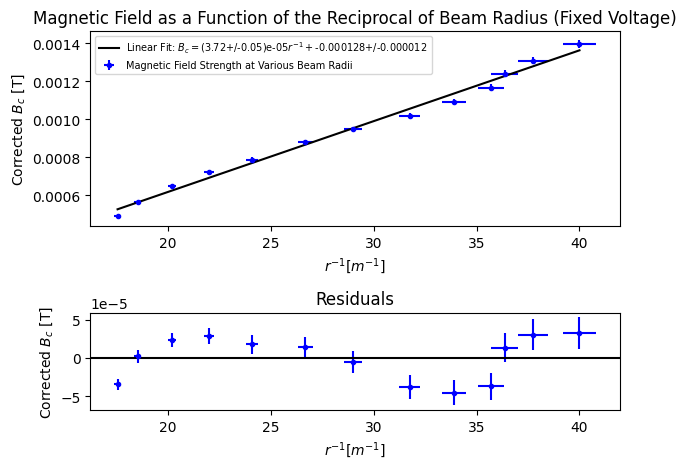

Reduced Chi Squared for plot: 6.004
Charge-to-Mass Ratio: (2.32+/-0.06)e+11
External Magnetic Field: 0.000128+/-0.000012


In [8]:
#Fixed Voltage

reciprocal_fixed_voltage_path_radii = (fixed_voltage_path_radii)**(-1) #takes reciprocal of radii measurements (x-axis)

#creates arrays of x and y data points, with uncertainty ranges
xs_fixed_voltage, xerror_fixed_voltage = np.array([x.n for x in reciprocal_fixed_voltage_path_radii]), np.array([x.s for x in reciprocal_fixed_voltage_path_radii])
ys_fixed_voltage, yerror_fixed_voltage = np.array([x.n for x in fixed_voltage_B_coil_values]), np.array([x.s for x in fixed_voltage_B_coil_values])

#computes line fit and reduced chi squared values
line_fit_slope_fixed_voltage, line_fit_y_intercept_fixed_voltage = compute_line_fit(reciprocal_fixed_voltage_path_radii, fixed_voltage_B_coil_values)
reduced_chi_squared_fixed_voltage = reduced_chi_squared(reciprocal_fixed_voltage_path_radii, fixed_voltage_B_coil_values, line_fit_slope_fixed_voltage, 
line_fit_y_intercept_fixed_voltage)
    
#plots x and y data points, and the linear fit
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [2, 1]})
ax1.errorbar(xs_fixed_voltage, ys_fixed_voltage, xerr= xerror_fixed_voltage, yerr= yerror_fixed_voltage, fmt=".", label="Magnetic Field Strength at Various Beam Radii", color="blue")
ax1.plot(xs_fixed_voltage, line_fit_slope_fixed_voltage.n * xs_fixed_voltage + line_fit_y_intercept_fixed_voltage.n, label="Linear Fit: $B_{c} =$" + str(line_fit_slope_fixed_voltage) + "$ r^{-1} + $" + 
str(line_fit_y_intercept_fixed_voltage), color="black")
ax1.legend(loc='best', prop={'size': 7})
ax1.set_xlabel("$r^{-1} [m^{-1}]$")
ax1.set_ylabel("Corrected $B_{c}$ [T]")
ax1.set_title("Magnetic Field as a Function of the Reciprocal of Beam Radius (Fixed Voltage)")

#residual plot
ax2.errorbar(xs_fixed_voltage, ys_fixed_voltage - (line_fit_slope_fixed_voltage.n * xs_fixed_voltage + line_fit_y_intercept_fixed_voltage.n),
            yerr=yerror_fixed_voltage, xerr=xerror_fixed_voltage, fmt=".",
            color="blue")
ax2.axhline(y=0, color="black")
ax2.set_xlabel("$r^{-1} [m^{-1}]$")
ax2.set_ylabel("Corrected $B_{c}$ [T]")
ax2.set_title("Residuals")

fig.tight_layout()
plt.show()
    
    
#estimates charge to mass based on the calculated slope
charge_to_mass_ratio_1 = ((line_fit_slope_fixed_voltage)/((2*fixed_voltage)**(0.5)))**(-2)
print("Reduced Chi Squared for plot:", round(reduced_chi_squared_fixed_voltage.n, 3))
print("Charge-to-Mass Ratio:", charge_to_mass_ratio_1)

#sets the external magnetic field based on the y-intercept
B_external = -line_fit_y_intercept_fixed_voltage
print("External Magnetic Field:", B_external)


Reduced $\chi^{2}$ for plot: 6.004

Charge-to-Mass Ratio: $(2.32+/-0.06) \times 10^{11} \frac{C}{kg}$ 

External Magnetic Field $B_{e}$: $(128 +/- 12) \mu T$ 

#### Part 3 - Secondary Calculation of Charge-to-Mass Ratio

From the linear fit function, we can interpolate a value of $B_{e} = (128 \pm 12) \mu T$ and $\sqrt{\frac{2m \cdot \Delta V}{e}}= (37.2 \pm 0.5)  \mu Tm$. Given the fixed value of the voltage, $\Delta V = (161.1 \pm 0.1) V$, the charge-to-mass ratio can be calculated to be $\frac{e}{m} = (2.32 \pm 0.06) \times 10^{11} \frac{C}{kg}$.

Given the value for $B_{e}$ determined above, we can use the fixed current measurements to obtain a second independent measurement for the charge-to-mass ratio. Eequation 14 from the report can be rearranged into the following form:

$ r = \frac{\sqrt{\frac{2m}{e}}}{(B_{c} + B_{e})} \sqrt{\Delta V}$

Now plotting $r$ as a function of $\sqrt{\Delta V}$, and considering $B = (B_{c} + B_{e})$ to be a constant, we can determine $\frac{e}{m}$ from the slope of the linear fit function. $B_{c}$, the applied magnetic field on the electrion, is not exactly constant; it varies slightly depending on the value of $r$, and we correct for this variation when calculate $B_{e}$ and $\frac{e}{m}$ in the previous part. However, for the purpose of this calculation, we will consider $B_{c}$ to be a constant with a value equal to the average of the corrected $B_{c}$ values from our fixed current measurements, and we will increase the uncertainty so that the uncertainty range encompasses all of those $B_{c}$ values.

In [9]:
#Fixed Current

#takes square root of voltage array for x-axis
root_fixed_current_voltages = (fixed_current_voltages)**(0.5)

#finds average magnetic field in the coils across all measurements
fixed_current_B_coil_average = sum(fixed_current_B_coil_values)/len(fixed_current_B_coil_values)

#sets increased uncertainty range
a = max(fixed_current_B_coil_values)
b = min(fixed_current_B_coil_values)
range = [a.n + a.s, b.n - b.s]

fixed_current_B_coil_average = ufloat(fixed_current_B_coil_average.n, 
max(range[0] - fixed_current_B_coil_average.n, fixed_current_B_coil_average.n - range[1]))


print(fixed_current_B_coil_average)

#adds coil magnetic field to external field to get total field
B_total = fixed_current_B_coil_average + B_external

0.000862+/-0.000026


Applied Magnetic Field $B_{c} = (862 \pm 26) \mu T$.

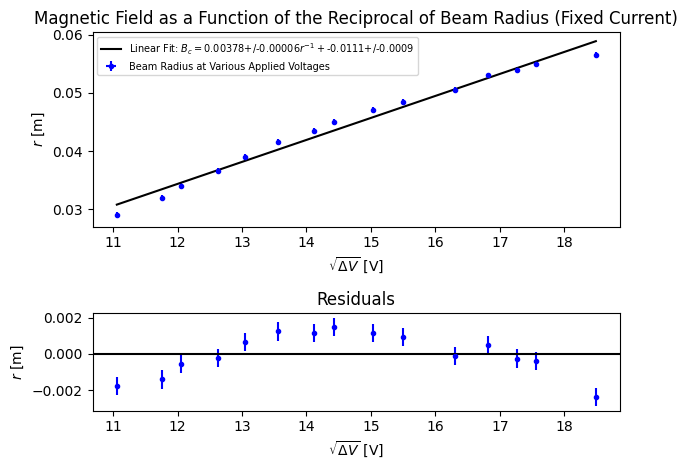

Reduced Chi Squared for plot: 5.99
Charge-to-Mass Ratio: (1.43+/-0.09)e+11


In [10]:

#creates arrays of x and y data points, with uncertainty ranges
xs_fixed_current, xerror_fixed_current = np.array([x.n for x in root_fixed_current_voltages]), np.array([x.s for x in root_fixed_current_voltages])
ys_fixed_current, yerror_fixed_current = np.array([x.n for x in fixed_current_path_radii]), np.array([x.s for x in fixed_current_path_radii])

#calculates linear fit slope and y-intercept, and reduced_chi_squared value
line_fit_slope_fixed_current, line_fit_y_intercept_fixed_current = compute_line_fit(root_fixed_current_voltages, fixed_current_path_radii)
reduced_chi_squared_fixed_current = reduced_chi_squared(root_fixed_current_voltages, fixed_current_path_radii, line_fit_slope_fixed_current, 
line_fit_y_intercept_fixed_current)

#plots the beam radius as a function of the square root of voltage
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [2, 1]})
ax1.errorbar(xs_fixed_current, ys_fixed_current, xerr= xerror_fixed_current, yerr= yerror_fixed_current, fmt=".", label="Beam Radius at Various Applied Voltages", color="blue")
ax1.plot(xs_fixed_current, line_fit_slope_fixed_current.n * xs_fixed_current + line_fit_y_intercept_fixed_current.n, label="Linear Fit: $B_{c} =$" + str(line_fit_slope_fixed_current) + "$ r^{-1} + $" + 
str(line_fit_y_intercept_fixed_current), color="black")
ax1.legend(loc='best', prop={'size': 7})
ax1.set_xlabel("$\sqrt{\Delta V}$ [V]")
ax1.set_ylabel("$r$ [m]")
ax1.set_title("Magnetic Field as a Function of the Reciprocal of Beam Radius (Fixed Current)")

#residual plot
ax2.errorbar(xs_fixed_current, ys_fixed_current - (line_fit_slope_fixed_current.n * xs_fixed_current + line_fit_y_intercept_fixed_current.n),
            yerr=yerror_fixed_current, xerr=xerror_fixed_current, fmt=".",
            color="blue")
ax2.axhline(y=0, color="black")
ax2.set_xlabel("$\sqrt{\Delta V}$ [V]")
ax2.set_ylabel("$r$ [m]")
ax2.set_title("Residuals")

fig.tight_layout()
plt.show()

#estimates charge to mass based on the calculated slope
charge_to_mass_ratio_2 = ((line_fit_slope_fixed_current*B_total)/(2**0.5))**(-2)
print("Reduced Chi Squared for plot:", round(reduced_chi_squared_fixed_current.n,3))
print("Charge-to-Mass Ratio:", charge_to_mass_ratio_2)

Reduced $\chi^{2}$ for plot: 5.990

Charge-to-Mass_Ratio: $(1.43+/-0.09) \times 10^{11} \frac{C}{kg}$

In [11]:
#averages both results for the charge-to-mass ratio
average_charge_to_mass_ratio = (charge_to_mass_ratio_1 + charge_to_mass_ratio_2)/2
print("Average of the 2 Charge-to-Mass Ratios:", average_charge_to_mass_ratio)

Average of the 2 Charge-to-Mass Ratios: (1.87+/-0.06)e+11


Average Charge-to-Mass Ratio: $(1.87+/-0.06) \times 10^{11} \frac{C}{kg}$

#### Part 4 - Final Remarks

The average of the two calculated charge-to-mass ratios is $(1.87+/-0.06) \times 10^{11} \frac{C}{kg}$. The generally accepted value for this ratio is about $1.758820 \times 10^{11} \frac{C}{kg}$. These two values of reasonably close, even though the uncertainty ranges do not quite overlap. Therefore, we can conclude that this experiment was largely successful in determining the charge-to-mass ratio of the electron. The external magnetic field was calculated to be  $B_{e} = (128 \pm 12) \mu T$. The earth's magnetic field is typically only about $25-65 \mu T$. The presence of electric devices near the apparatus, such as phones and laptops, as well as the voltage and current sources used to run the experiment, could also contribute a few $\mu T$ to the overall magnetic field. 